### Objective
The objective of this project is to analyze and mitigate hate speech 
in online platforms through a comprehensive approach tha 
encompasses contextual analysis, temporal analysis, user profilin ,
geospatial analyis, and h te
speech detection. By addressing these aspects, the project aim  to
enhance our understanding of hate speech dynamics, ide tify
patterns and trends over time, profile users prone to engag ng in
hate speech, analyze geographic distributions, evaluat  model
performance, and ultimately develop effective strategies t  detect
and mitigate hate speech online.

### Getting Started

#### Reading the data

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data
df=pd.read_csv(r'Annotations_Metadata.csv')

In [3]:
# Shape
df.shape

(10944, 5)

In [4]:
# Data
df.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [5]:
# Files
files=[file for file in os.listdir(r"C:\Users\hp\Downloads\Text file")]
len(files)

10944

In [6]:
# Initializing
txt={'text':[]}

In [7]:
# Reading the txt file
for file in files:
    try:
        data=pd.read_csv(r"C:\Users\hp\Downloads\Text file\{}".format(file))
        txt['text'].append(data)
    except:
        txt['text'].append(np.nan)

In [8]:
# Text Dataframe
txt_df=pd.DataFrame(txt)

In [9]:
# Concatinating dataframes
df=pd.concat([df,txt_df],axis=1)

In [10]:
# Striping the un wanted
df['text']=df['text'].apply(lambda x : str(x).lstrip('Empty DataFrameColumns: [').rstrip(']Index: []'))

In [11]:
# Sample
df['text'][0]

'\nColumns: [As of March 13th ,  2014 ,  the booklet had been downloaded over 18, 300 times and counting .]\n'

In [12]:
# Striping off
df['text']=df['text'].apply(lambda x : str(x).lstrip('\nColumns: [').rstrip(']\n'))

In [13]:
# Data
df['text'][0]

'As of March 13th ,  2014 ,  the booklet had been downloaded over 18, 300 times and counting .'

In [14]:
# Column name
df.columns

Index(['file_id', 'user_id', 'subforum_id', 'num_contexts', 'label', 'text'], dtype='object')

In [15]:
# Data
df.sample(3)

,file_id,user_id,subforum_id,num_contexts,label,text
6826,13507823_8,577743,1345,0,noHate,"Anyways , smearing a single DNA stem with bla..."
2254,12848217_17,575810,1346,0,noHate,Thank you .
2496,13844418_1,591104,1391,0,noHate,dont you get cold when you step out from the w...


In [16]:
# Shape
df.shape

(10944, 6)

<Axes: >

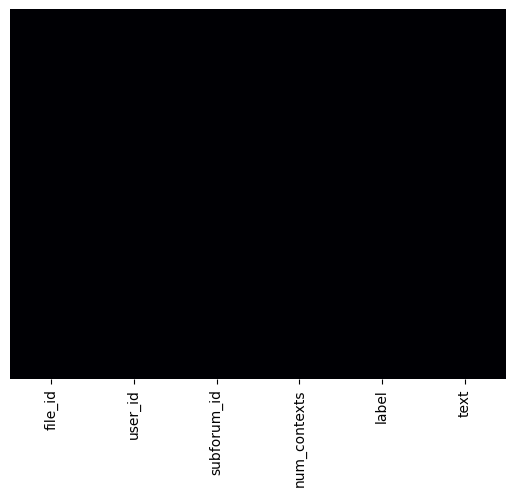

In [17]:
# Null values
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='magma')

#### Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

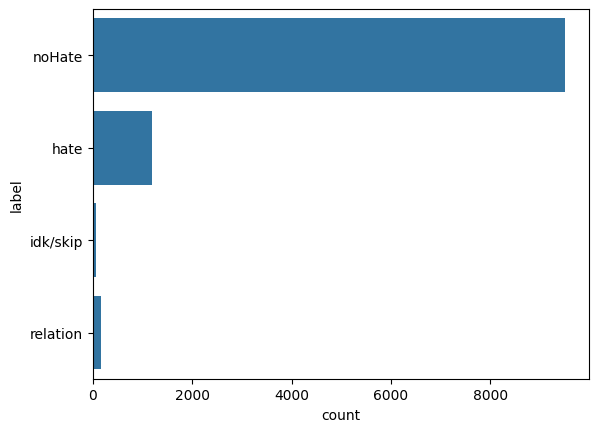

In [18]:
# Categories
sns.countplot(y=df['label'])

<Axes: xlabel='label', ylabel='num_contexts'>

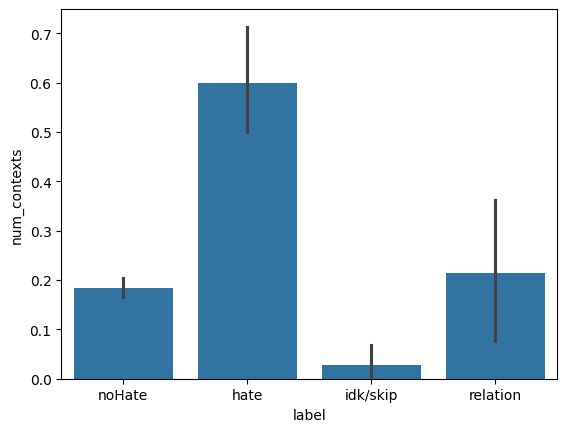

In [19]:
# Num_contexts
sns.barplot(df,y='num_contexts',x='label')

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

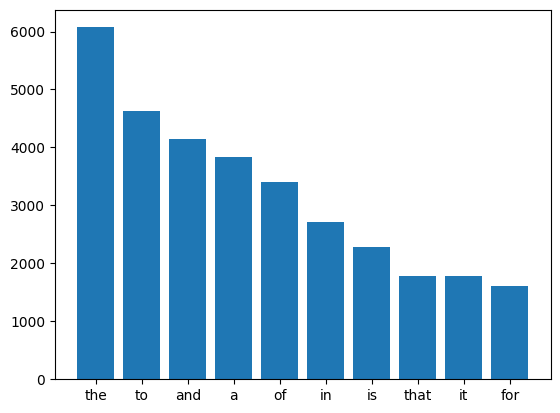

In [21]:
# Visualizing the stopwords
from nltk.corpus import stopwords
def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1

    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(df['text'])

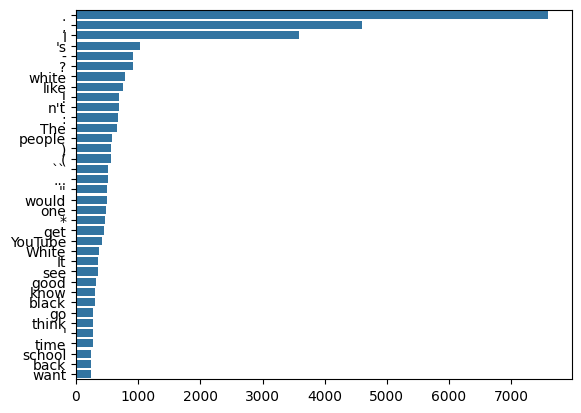

In [22]:
# Visualizing the frequent word
import collections
from collections import Counter
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(df['text'])

(-0.5, 1439.5, 1079.5, -0.5)

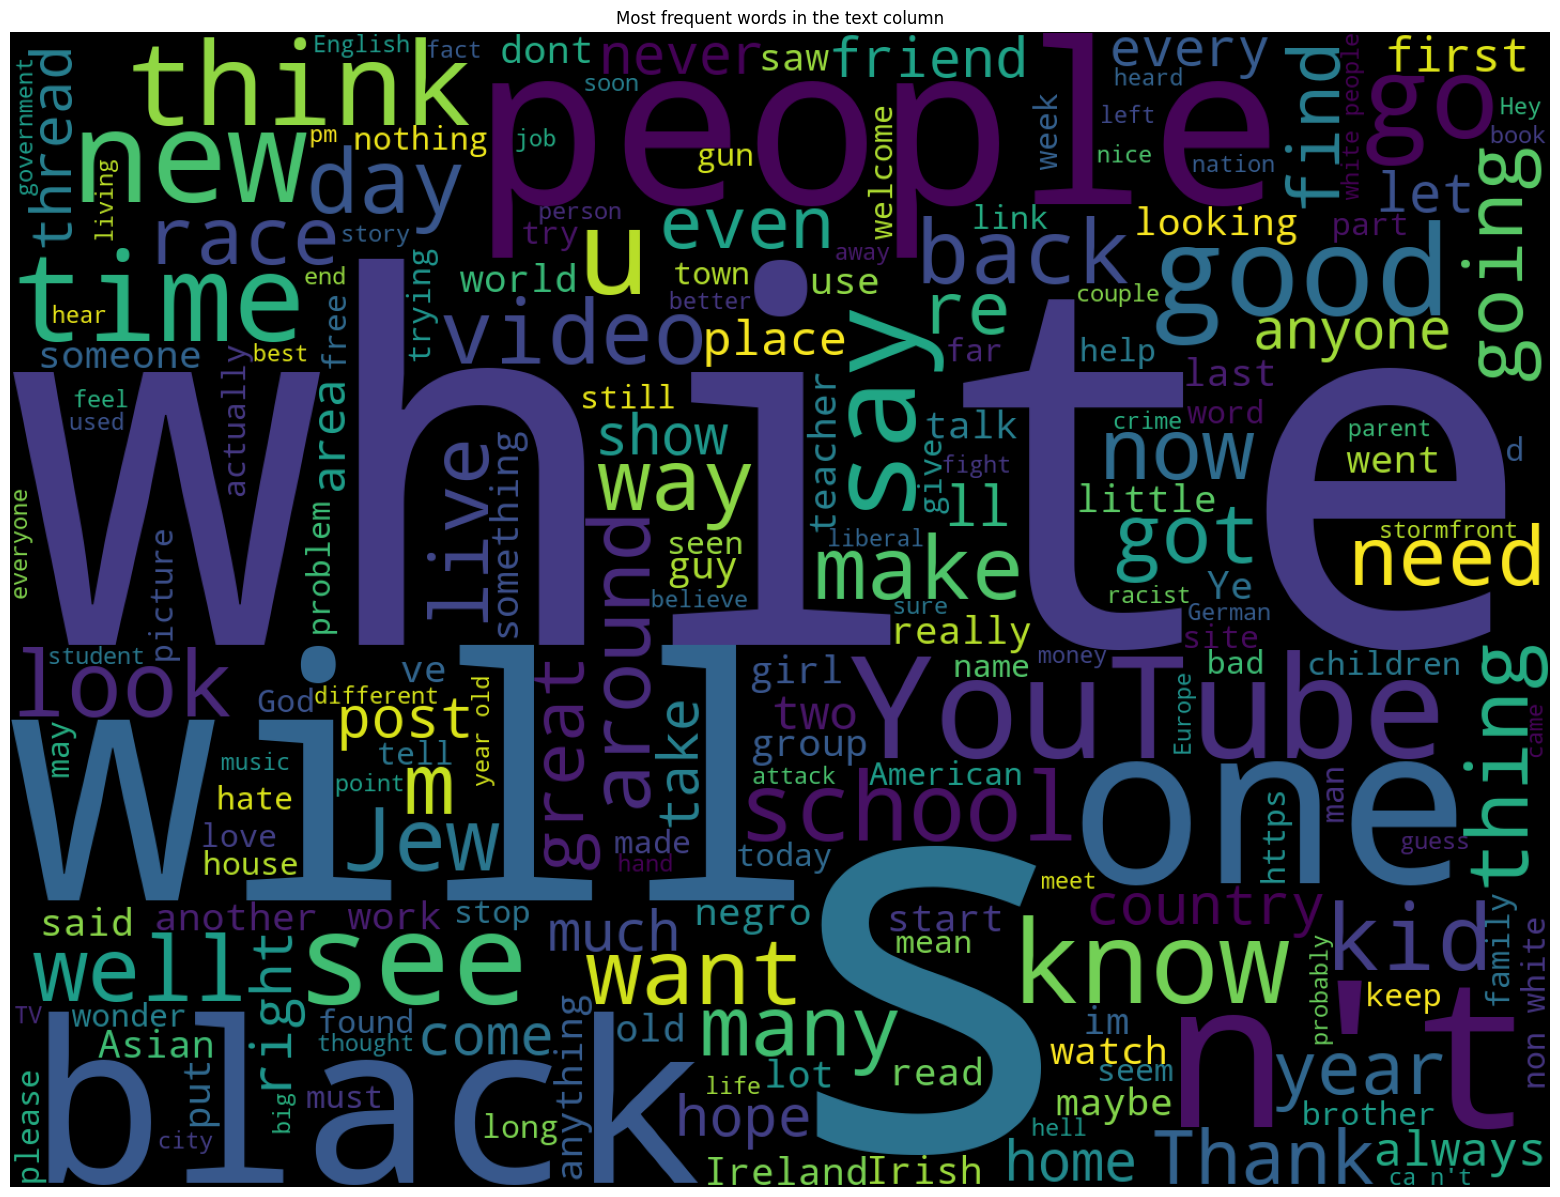

In [23]:
# Most frequent word
from wordcloud import WordCloud, STOPWORDS
train_desc = pd.Series(df['text'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080,stopwords=STOPWORDS).generate(" ".join(train_desc.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title("Most frequent words in the text column")
plt.axis('off')

#### Data Preprocessing

In [72]:
# Encoding label
lab={'noHate':0,'hate':1,'idk/skip':2,'relation':3}
df['label']=df['label'].replace(lab)
df['label'].unique()

array([0, 1, 2, 3], dtype=int64)

In [73]:
# Splitting dependent and independent feature
X=df[['text','subforum_id']]
y=df['label']

In [43]:
# Copy
message=X.copy()
message

,text,subforum_id
0,"As of March 13th , 2014 , the booklet had be...",1346
1,Thank you in advance. : ) Download the youtube...,1346
2,In order to help increase the booklets downloa...,1346
3,( Simply copy and paste the following text int...,1346
4,ick below for a FREE download of a colorfully ...,1346
...,...,...
10939,Apparently he came to the conclusion that his ...,1388
10940,Wish we at least had a Marine Le Pen to vote f...,1388
10941,Its like the choices are white genocide candid...,1388
10942,Why White people used to say that sex was a si...,1388


In [31]:
import nltk
import re
from nltk.corpus import stopwords

In [44]:
# Lowercasing the column
message['text']=message['text'].str.lower()
print('Lowercase done....!')
message.head()

Lowercase done....!


,text,subforum_id
0,"as of march 13th , 2014 , the booklet had be...",1346
1,thank you in advance. : ) download the youtube...,1346
2,in order to help increase the booklets downloa...,1346
3,( simply copy and paste the following text int...,1346
4,ick below for a free download of a colorfully ...,1346


In [45]:
# Tokenization
message['text'] = message['text'].apply(nltk.word_tokenize)
print('Tokenization Done....!')
message.head()

Tokenization Done....!


,text,subforum_id
0,"[as, of, march, 13th, ,, 2014, ,, the, booklet...",1346
1,"[thank, you, in, advance, ., :, ), download, t...",1346
2,"[in, order, to, help, increase, the, booklets,...",1346
3,"[(, simply, copy, and, paste, the, following, ...",1346
4,"[ick, below, for, a, free, download, of, a, co...",1346


In [39]:
# Removal of stopword
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)

    return result

In [46]:
# Stopwords removing
message['text'] = message['text'].apply(remove_stopwords)
print('Stopwords removed....!')
message.head()

Stopwords removed....!


,text,subforum_id
0,"[march, 13th, ,, 2014, ,, booklet, downloaded,...",1346
1,"[thank, advance, ., :, ), download, youtube, `...",1346
2,"[order, help, increase, booklets, downloads, ,...",1346
3,"[(, simply, copy, paste, following, text, yout...",1346
4,"[ick, free, download, colorfully, illustrated,...",1346


In [47]:
# Removal of punctuation
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):

    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

In [50]:
# Removing punctuation
message['text'] = message['text'].apply(remove_punct)
print('Punctuations Removed....!')
message.head()

Punctuations Removed....!


,text,subforum_id
0,"[march, 13th, 2014, booklet, downloaded, 18, 3...",1346
1,"[thank, advance, download, youtube, descriptio...",1346
2,"[order, help, increase, booklets, downloads, w...",1346
3,"[simply, copy, paste, following, text, youtube...",1346
4,"[ick, free, download, colorfully, illustrated,...",1346


In [53]:
# List
corpus=[]
for i in message['text']:
    review=' '.join(i)
    corpus.append(review)

#### Encoding

In [26]:
# Vocabulary size
voc_size=5000

In [54]:
# OneHot encoding
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[4057, 4931, 1186, 2833, 3729, 2571, 708, 2175, 3974],
 [370,
  122,
  3317,
  3694,
  2978,
  2969,
  1377,
  614,
  3048,
  4499,
  3700,
  4153,
  2251,
  3317,
  4881,
  2833,
  2978,
  2969,
  1377,
  4079],
 [1248,
  2461,
  4141,
  2997,
  1682,
  2872,
  2714,
  4329,
  3694,
  4577,
  139,
  4109,
  1057,
  614,
  2978,
  1282,
  3068,
  3694,
  3670],
 [4688, 2876, 1485, 1057, 614, 3694, 3670, 2978, 1282],
 [1702,
  4381,
  3317,
  261,
  3765,
  976,
  1901,
  2808,
  4015,
  3298,
  2226,
  3105,
  375,
  2694,
  1315],
 [1702, 3317, 174, 2623, 3673, 2192, 2124, 4097],
 [2833, 4315, 2811, 1779, 1186],
 [2571, 708, 1682],
 [2883,
  3048,
  4499,
  3700,
  4153,
  2251,
  3317,
  1886,
  448,
  2538,
  3503,
  3503,
  2670,
  4499,
  3700,
  4153,
  2251,
  3317,
  3390,
  448,
  2538,
  3503,
  3503,
  960,
  3638,
  4894,
  245,
  309,
  3704,
  3298,
  3185,
  2694,
  1315,
  4499,
  1510,
  1386,
  309,
  3039,
  1256,
  3298,
  3185,
  1956,
  2694,
  1315,
  3578,
  13

In [56]:
# Padding
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  708 2175 3974]
 [   0    0    0 ... 2969 1377 4079]
 [   0    0    0 ... 3068 3694 3670]
 ...
 [   0    0    0 ... 1378 2538 1440]
 [   0    0    0 ... 3561 1914 1326]
 [   0    0    0 ...    0    0 3802]]


#### Model

##### LSTM

In [83]:
# Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(4,activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 40)            200000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               56400     
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 256804 (1003.14 KB)
Trainable params: 256804 (1003.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [74]:
# Assigning the feature
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [78]:
y_final

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [75]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.30,random_state=42)

In [84]:
# Train the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
120/120 [==============================] - 17s 103ms/step - loss: 0.5550 - accuracy: 0.8621 - val_loss: 0.4532 - val_accuracy: 0.8748
Epoch 2/10
120/120 [==============================] - 11s 90ms/step - loss: 0.4658 - accuracy: 0.8661 - val_loss: 0.4504 - val_accuracy: 0.8748
Epoch 3/10
120/120 [==============================] - 9s 75ms/step - loss: 0.4348 - accuracy: 0.8661 - val_loss: 0.4833 - val_accuracy: 0.8748
Epoch 4/10
120/120 [==============================] - 10s 85ms/step - loss: 0.3611 - accuracy: 0.8749 - val_loss: 0.5628 - val_accuracy: 0.8712
Epoch 5/10
120/120 [==============================] - 11s 91ms/step - loss: 0.3060 - accuracy: 0.8927 - val_loss: 0.6426 - val_accuracy: 0.8060
Epoch 6/10
120/120 [==============================] - 11s 92ms/step - loss: 0.2540 - accuracy: 0.9133 - val_loss: 0.7063 - val_accuracy: 0.8112
Epoch 7/10
120/120 [==============================] - 11s 94ms/step - loss: 0.2056 - accuracy: 0.9321 - val_loss: 0.8216 - val_accuracy:

In [85]:
# y_pred
y_pred=model.predict(X_test)

103/103 [==============================] - 3s 21ms/step


In [90]:
# Accuracy of the model
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

103/103 [==============================] - 2s 16ms/step - loss: 1.2040 - accuracy: 0.7722
Test set
  Loss: 1.204
  Accuracy: 0.772


In [108]:
# Testing with new sentence
text='the Food was horrible'

text=text.lower().split()

out=remove_stopwords(text)

oh=[one_hot(words,voc_size) for words in out]

padded=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

pred = model.predict(padded)

labels = ['noHate','hate','idk/skip','relation']

print(labels[np.argmax(pred)])


342/342 [==============================] - 7s 22ms/step
hate


##### Machine Learning model

In [111]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))

tf_idf1 = tf_idf.fit_transform(message[['text']])

tf_idf1

<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [112]:
#split data
X_ml = message.text
y_ml = df.label

X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, train_size = 0.75, random_state = 1)

In [113]:
# Converting the string
X_train=X_train.apply(str)
X_test=X_test.apply(str)

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
vector.vocabulary_
X_transformed = vector.transform(X_train)
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)

In [115]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)
# Fitting our Logistic Regression Model

LogisticRegression()

In [116]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(logistic_reg.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(logistic_reg.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2682
           1       0.01      0.06      0.02        52
           2       0.00      0.00      0.00         0
           3       0.03      0.50      0.05         2

    accuracy                           0.86      2736
   macro avg       0.25      0.36      0.25      2736
weighted avg       0.96      0.86      0.91      2736



[[2342  287   17   36]
 [  47    3    1    1]
 [   0    0    0    0]
 [   1    0    0    1]]


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [117]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_transformed, y_train)

RandomForestClassifier()

In [118]:
# validation
print(classification_report(rf.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(rf.predict(X_test_transformed), y_test))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2639
           1       0.03      0.12      0.05        85
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        12

    accuracy                           0.85      2736
   macro avg       0.25      0.25      0.24      2736
weighted avg       0.93      0.85      0.89      2736



[[2310  277   17   35]
 [  71   10    1    3]
 [   0    0    0    0]
 [   9    3    0    0]]


In [119]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_transformed,y_train)

DecisionTreeClassifier()

In [120]:
print(classification_report(dt.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(dt.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2461
           1       0.09      0.11      0.10       236
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        30

    accuracy                           0.80      2736
   macro avg       0.25      0.25      0.25      2736
weighted avg       0.82      0.80      0.81      2736



[[2158  256   17   30]
 [ 200   27    1    8]
 [   9    0    0    0]
 [  23    7    0    0]]


=================================================================================================================